In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


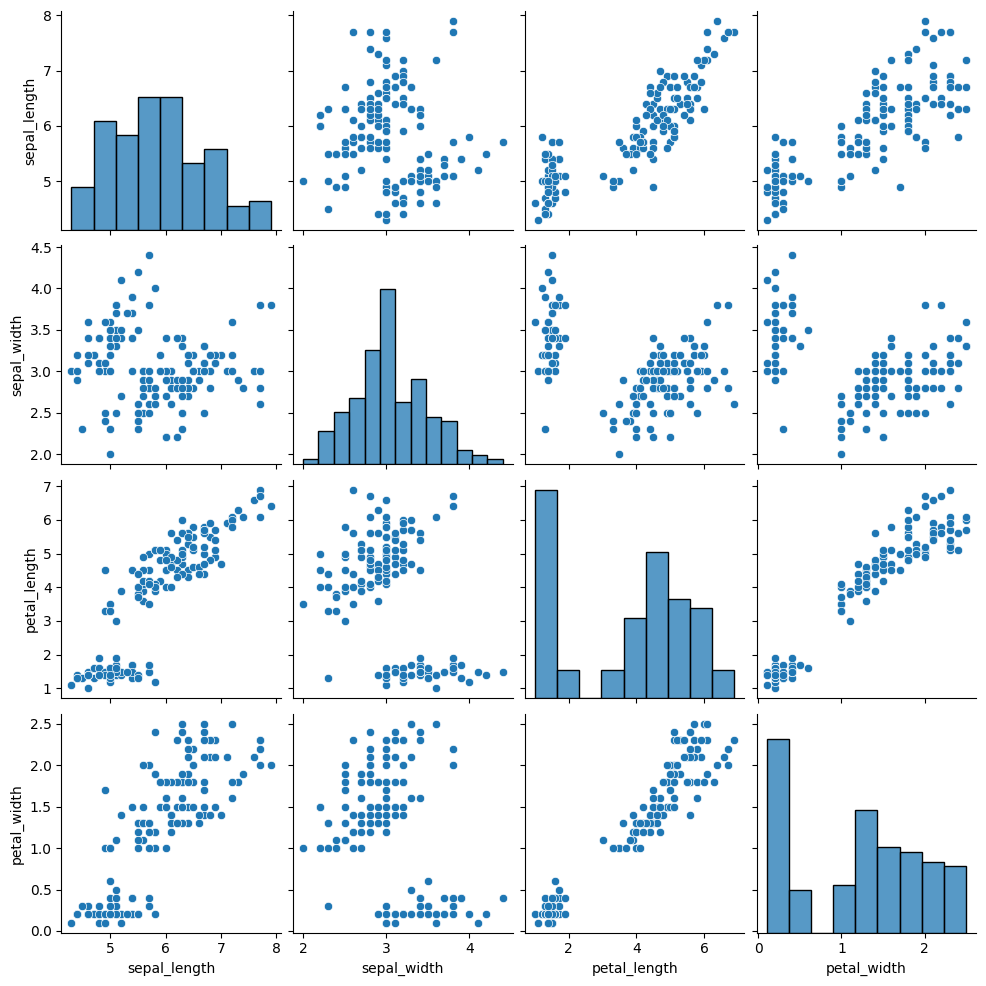

In [10]:
sns.pairplot(iris)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


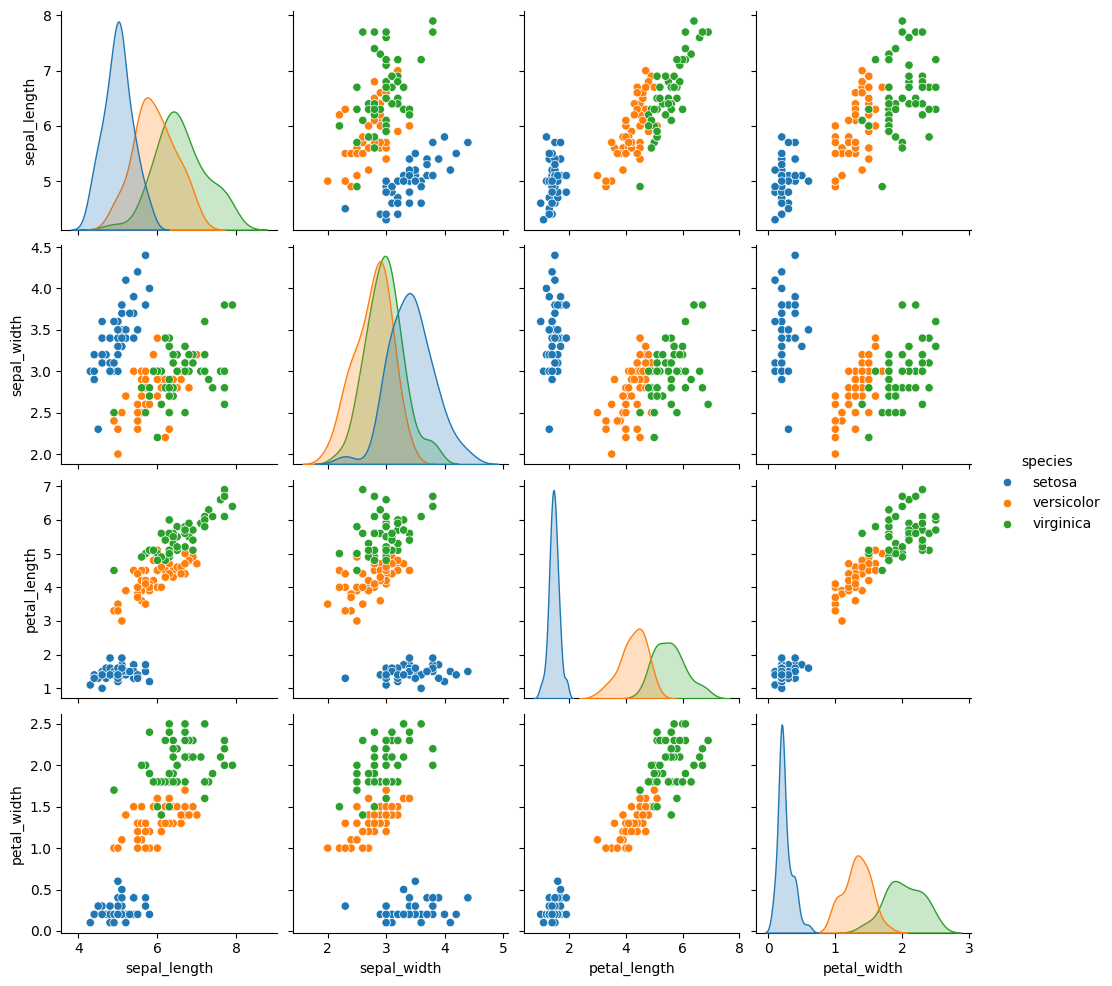

In [11]:
sns.pairplot(iris, hue= "species", palette= "tab10")

In [12]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
setosa = iris[iris['species'] == 'setosa']

In [14]:
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: ylabel='Density'>

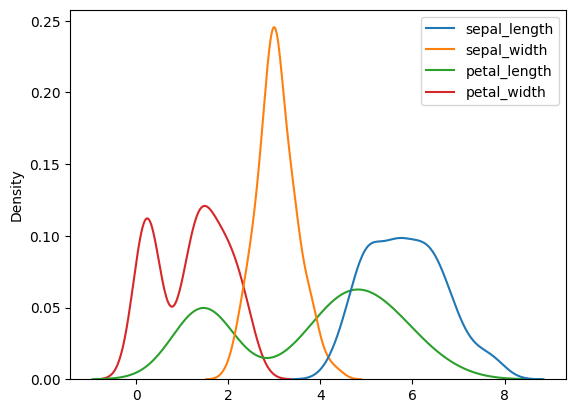

In [15]:
sns.kdeplot(data= iris)

<Axes: ylabel='Density'>

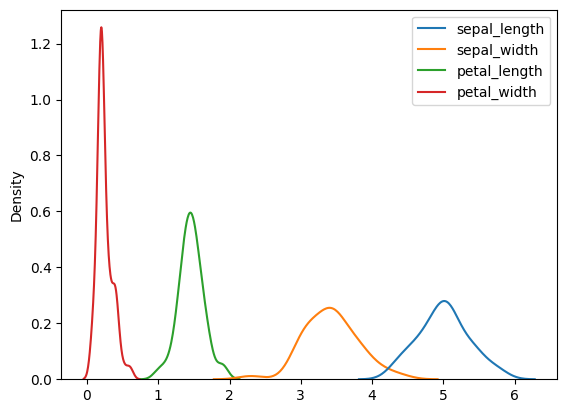

In [16]:
sns.kdeplot(data= setosa)

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

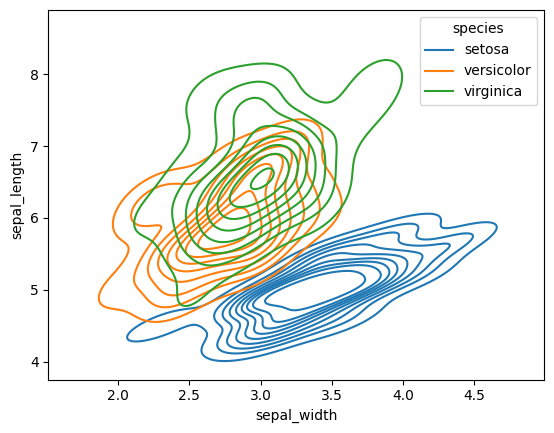

In [17]:
sns.kdeplot(data= iris, x= "sepal_width", y= "sepal_length", hue= "species")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_4784\454342655.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= iris, x= "sepal_width", y= "sepal_length", hue= "species", shade= True)


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

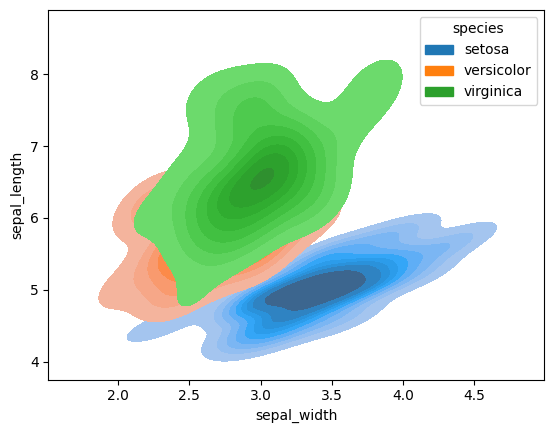

In [18]:
sns.kdeplot(data= iris, x= "sepal_width", y= "sepal_length", hue= "species", shade= True)

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

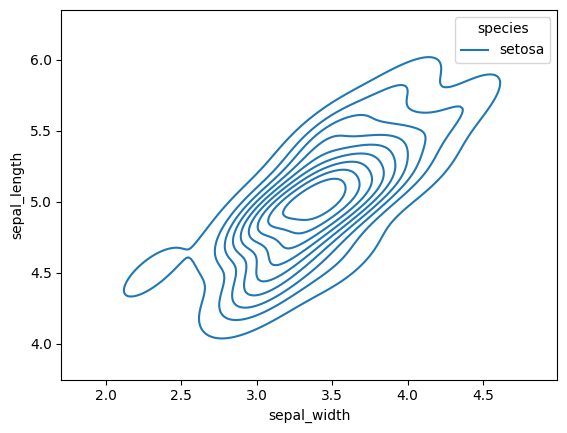

In [19]:
sns.kdeplot(data= setosa, x= "sepal_width", y= "sepal_length", hue= "species")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_4784\3603980180.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= setosa, x= "sepal_width", y= "sepal_length", hue= "species", shade= True)


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

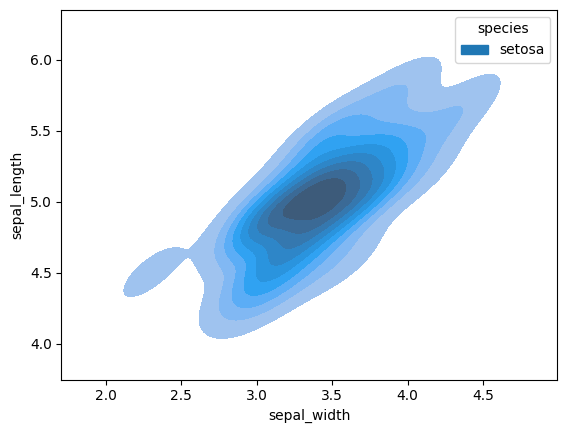

In [20]:
sns.kdeplot(data= setosa, x= "sepal_width", y= "sepal_length", hue= "species", shade= True)

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

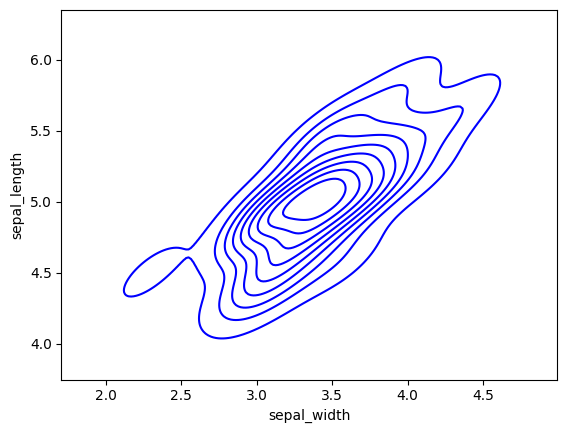

In [21]:
sns.kdeplot(x= setosa['sepal_width'], y= setosa['sepal_length'], color= "b")

C:\Users\H_PC\AppData\Local\Temp\ipykernel_4784\2174984157.py:1: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= setosa, x= "sepal_width", y= "sepal_length", shade= True, shade_lowest=False )
C:\Users\H_PC\AppData\Local\Temp\ipykernel_4784\2174984157.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= setosa, x= "sepal_width", y= "sepal_length", shade= True, shade_lowest=False )


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

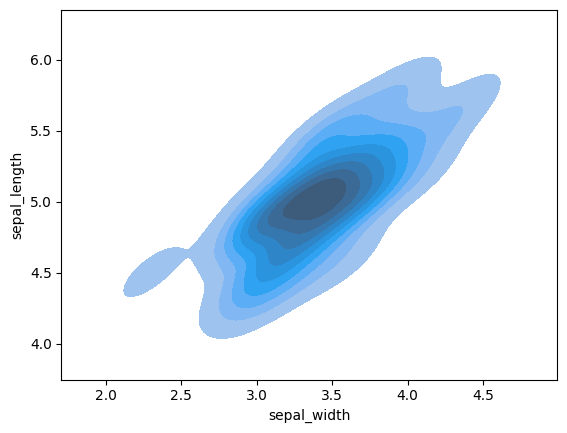

In [22]:
sns.kdeplot(data= setosa, x= "sepal_width", y= "sepal_length", shade= True, shade_lowest=False )

In [23]:
X = iris.drop("species",axis=1)
y = iris["species"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [25]:
svc_model = SVC()

In [26]:
svc_model.fit(X_train, y_train)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

SVC()

In [27]:
svc_model

SVC()

In [28]:
Prediction = svc_model.predict(X_test)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [29]:
Prediction

array(['versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor'], dtype=object)

In [30]:
print(confusion_matrix(y_test, Prediction))

[[11  0  0]
 [ 0 17  1]
 [ 0  3 13]]


C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [31]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.85      0.94      0.89        18
   virginica       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [32]:
param_grid = {"C": [0.1, 1, 10, 100, 1000],
              "gamma": [1, 0.1, 0.01, 0.001, 0.0001]} 

In [33]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose= 3)

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.857 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.905 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.952 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.905 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.952 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.524 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.333 total time=   0.0s
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.381 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.381 total time=   0.0s
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.381 total time=   0.0s
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.381 total time=   0.0s
[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.333 total time=   0.0s
[CV 1/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ...............

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

[CV 5/5] END ....................C=1, gamma=0.1;, score=0.952 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.905 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;, score=0.952 total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.01;, score=0.905 total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.01;, score=0.857 total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.01;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.714 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;, score=0.714 total time=   0.0s
[CV 3/5] END ..................C=1, gamma=0.001;, score=0.714 total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.001;, score=0.667 total time=   0.0s
[CV 5/5] END ..................C=1, gamma=0.001;, score=0.667 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.381 total time=   0.0s
[CV 2/5] END ...............

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

[CV 4/5] END .....................C=10, gamma=1;, score=0.857 total time=   0.0s
[CV 5/5] END .....................C=10, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ...................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.905 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.01;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=1.000 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.952 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.952 total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.952 total time=   0.0s
[CV 1/5] END ...............

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

[CV 1/5] END ................C=10, gamma=0.0001;, score=0.714 total time=   0.0s
[CV 2/5] END ................C=10, gamma=0.0001;, score=0.714 total time=   0.0s
[CV 3/5] END ................C=10, gamma=0.0001;, score=0.714 total time=   0.0s
[CV 4/5] END ................C=10, gamma=0.0001;, score=0.667 total time=   0.0s
[CV 5/5] END ................C=10, gamma=0.0001;, score=0.667 total time=   0.0s
[CV 1/5] END ....................C=100, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=100, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=100, gamma=1;, score=0.952 total time=   0.0s
[CV 4/5] END ....................C=100, gamma=1;, score=0.857 total time=   0.0s
[CV 5/5] END ....................C=100, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=100, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=100, gamma=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END ...............

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

[CV 5/5] END .................C=100, gamma=0.01;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=100, gamma=0.001;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.001;, score=1.000 total time=   0.0s
[CV 3/5] END ................C=100, gamma=0.001;, score=0.952 total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.001;, score=0.952 total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.001;, score=0.952 total time=   0.0s
[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.905 total time=   0.0s
[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.952 total time=   0.0s
[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.905 total time=   0.0s
[CV 4/5] END ...............C=100, gamma=0.0001;, score=0.857 total time=   0.0s
[CV 5/5] END ...............C=100, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 1/5] END ...................C=1000, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ...............

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [35]:
grid_prediction = grid.predict(X_test)

C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [36]:
grid_prediction

array(['versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor'], dtype=object)

In [37]:
print(confusion_matrix(y_test, grid_prediction))

[[11  0  0]
 [ 0 17  1]
 [ 0  0 16]]


C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [38]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.94      0.97        18
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\H_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
